In [33]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import glob,os
import pathlib
import os

In [34]:
import PIL
from PIL import Image

In [35]:
train_dir = pathlib.Path("/Users/hmy/Documents/2020_Fall/823/insects/train")
test_dir = pathlib.Path("/Users/hmy/Documents/2020_Fall/823/insects/test")

In [36]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

1019


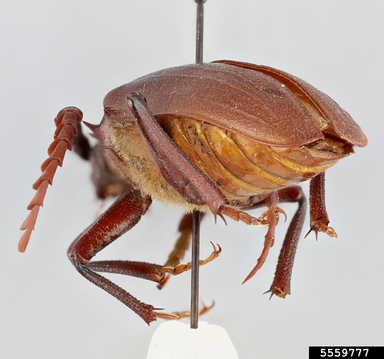

In [37]:
beetles = list(train_dir.glob('beetles/*'))
PIL.Image.open(str(beetles[0]))

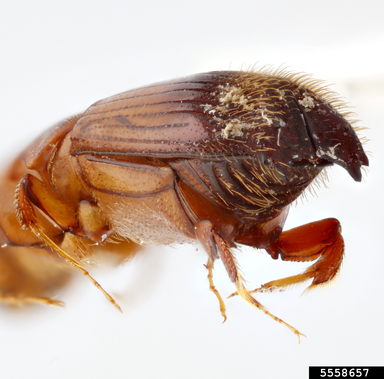

In [38]:
PIL.Image.open(str(beetles[2]))

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
train = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir, batch_size=32, image_size=(img_height, img_width))

Found 1019 files belonging to 3 classes.


In [41]:
test = tf.keras.preprocessing.image_dataset_from_directory(
       test_dir, batch_size=32, image_size=(img_height, img_width))

Found 180 files belonging to 3 classes.


In [42]:
class_names = train.class_names
print(class_names)

['beetles', 'cockroach', 'dragonflies']


In [43]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [45]:
# standardlize
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [46]:
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [47]:
# create model
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [50]:
epochs=10
history = model.fit(
  train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 13s 388ms/step - loss: 1.1982 - accuracy: 0.4648 - val_loss: 0.6673 - val_accuracy: 0.7444
Epoch 2/10
32/32 [==============================] - 12s 354ms/step - loss: 0.4320 - accuracy: 0.8439 - val_loss: 0.5453 - val_accuracy: 0.8167
Epoch 3/10
32/32 [==============================] - 12s 354ms/step - loss: 0.3185 - accuracy: 0.8833 - val_loss: 0.4424 - val_accuracy: 0.8667
Epoch 4/10
32/32 [==============================] - 12s 374ms/step - loss: 0.2443 - accuracy: 0.9145 - val_loss: 0.3432 - val_accuracy: 0.8667
Epoch 5/10
32/32 [==============================] - 12s 373ms/step - loss: 0.1979 - accuracy: 0.9264 - val_loss: 0.2371 - val_accuracy: 0.9333
Epoch 6/10
32/32 [==============================] - 12s 369ms/step - loss: 0.1395 - accuracy: 0.9499 - val_loss: 0.1625 - val_accuracy: 0.9333
Epoch 7/10
32/32 [==============================] - 12s 366ms/step - loss: 0.0847 - accuracy: 0.9754 - val_loss: 0.0923 - val_accuracy: 0.9778

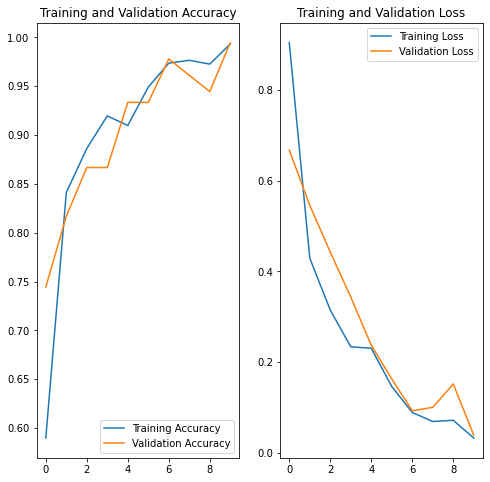

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()